In [1]:
# importing the libraries need
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# importing data frame from sheet name MainData
df_sheet = pd.read_excel("Lines_Plot.xlsx")
# importing data frame used for naming
df_station_name = pd.read_excel("Station_Name_Id.xlsx")

In [2]:
def counter_(unique_sample, total_sample):
    # defining the counter array size = size(unique_Sample)
    counter_temp = []

    for i in range(len(unique_sample)):
        # counting the number of times total sample have value greater than unique
        temp_c = (total_sample[:] >= unique_sample[i]).sum()

        # Finding the percentage of counter_temp over total sample
        temp_per = (temp_c/len(total_sample))*100

        # appending to the counter variable
        counter_temp.append(temp_per)

    return counter_temp

In [3]:
def month_decider(i, month_number):
    row_indexing = [2880, 5856]
    if (month_number == 0):
        temp_sample = df_sheet.iloc[0:2880, i]
        return temp_sample
    elif (month_number == 1):
        temp_sample = df_sheet.iloc[2880:5856, i]
        return temp_sample
    else:
        temp_sample = df_sheet.iloc[5856:, i]
        return temp_sample
    

In [4]:
def title_decider(col_num):
    # get the array of station id and name from Station_Name_Id.xlsx
    station_id = df_station_name["Station ICT ID"]
    station_name = df_station_name["Station Name"]
    
    # gettting actual id from Lines_Plot.xlsx for given column
    actual_id = df_sheet.columns[col_num]
    
    # checking codition for actual id == station_id[col_num]
    for i in range(len(station_id)):
        if (station_id[i] == actual_id):
            s_name = station_name[i]
            return s_name
    s_name = actual_id
    return s_name

In [5]:
def x_y_values(i, reference_vol):    
    # color decider
    color_grph = ['r', 'b', 'g']
    label_grph = ['April', 'May', 'June']
    
    
    # plotting for 3 months
    for month_number in range(3):
        # Taking ith column
        total_sample = month_decider(i, month_number)

        # unique value by using "unique()" method
        max_value_us = max(total_sample)+20
        unique_sample = np.arange(0, max_value_us, 20)

        # Calling counter function
        counter_values = counter_(unique_sample, total_sample)

        # Defining the axis values for plotting
        x_axis_values = counter_values
        y_axis_values = unique_sample

        # plotting the graph
        plt.plot(x_axis_values, y_axis_values, color = color_grph[month_number], label = label_grph[month_number])
       
    
    # Graphing the reference line
    plt.plot(np.arange(0, 100, 1), np.repeat(reference_vol, 100), color = "black", label = f"Ref Volt = {reference_vol} MW")
    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("% Time Duration")
    plt.ylabel("Load (Mega Watt)")
    title_name = title_decider(i)
    plt.title(title_name)

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # save image as 'png'
    plt.savefig("output.png")
    
    # To load the display window
    plt.show()   

Enter the column index you want to plot = 100
Enter the reference voltage = 600


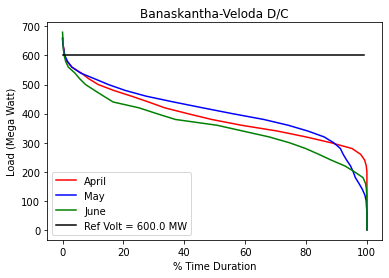

In [6]:
def runner_():
    i = int(input("Enter the column index you want to plot = "))
    ref_vol = float(input("Enter the reference voltage = "))
    if (0<i<=103):
        x_y_values(i, ref_vol)
    else:
        print("Enter the valid index for column")
        runner_()


runner_()